그룹 연산
- 복잡한 데이터를 어떤기준에 따라 여러 그룹으로 나누어서 관찰할 수 있으며 이런 방식으로 분할 처리하는 것을 그룹 연산이라 한다.
- 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적이며 판다스 groupby() 메소드를 사용한다.
- 그룹 객체 만들기(분할)
- 그룹 연산 메소드(적용, 결합)

In [1]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]

print('승객 수:', len(df))
display(df.head())

승객 수: 891


,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [2]:
df.value_counts('class')

class
Third     491
First     216
Second    184
dtype: int64

In [3]:
grouped = df.groupby(['class'])
# list(grouped)
for key, group in grouped:
    print('* key:', key)
    print('* number:', len(group))
    print(group.head())
    print()

* key: First
* number: 216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1

* key: Second
* number: 184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1

* key: Third
* number: 491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0



In [4]:
average = grouped.mean()
average

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [5]:
grouped.max()

,age,sex,fare,survived
class,,,,
First,80.0,male,512.3292,1
Second,70.0,male,73.5000,1
Third,74.0,male,69.5500,1


In [6]:
# 연습문제 - 'Third' 그룹만을 선택해서 group3 이름으로 저장하고 통계요약표 출력

group3 = grouped.get_group('Third')
group3.describe() # 전체 요약 (4분위 값도 정렬/출력)

,age,fare,survived
count,355.000000,491.000000,491.000000
mean,25.140620,13.675550,0.242363
std,12.495398,11.778142,0.428949
min,0.420000,0.000000,0.000000
25%,18.000000,7.750000,0.000000
50%,24.000000,8.050000,0.000000
75%,32.000000,15.500000,0.000000
max,74.000000,69.550000,1.000000


In [7]:
# class 열, sex 열을 기준으로 분할하여 grouped_two에 저장

grouped_two = df.groupby(['class', 'sex'])
for key, group in grouped_two:
    print("* KEY:", key)
    print("* NUM:", len(group))
    print(group.head())
    print()

* KEY: ('First', 'female')
* NUM: 94
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1

* KEY: ('First', 'male')
* NUM: 122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0

* KEY: ('Second', 'female')
* NUM: 76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1

* KEY: ('Second', 'male')
* NUM: 108
     age   sex   class  fare  survived
17   NaN  male  Second  13.0  

In [8]:
average_two = grouped_two.mean()
average_two

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [9]:
# 연습문제 - ('Third', 'female') 그룹을 선택해서 group3f에 저장하고 처음 5개행 출력

group3f = grouped_two.get_group(('Third', 'female'))
group3f.head()

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0


In [10]:
group3f[['age', 'fare']].describe()

,age,fare
count,102.000000,144.000000
mean,21.750000,16.118810
std,12.729964,11.690314
min,0.750000,6.750000
25%,14.125000,7.854200
50%,21.500000,12.475000
75%,29.750000,20.221875
max,63.000000,69.550000


#### 적용-결합
데이터 집계(agg)
- 집계 연산을 처리하는 사용자 정의함수를 그룹 객체에 적용하려면 agg() 메소드 사용
- 모든 열에 여러 함수를 매핑: group객체.agg([함수1, 함수2, 함수3, ...])
- 각 열마다 다른 함수를 매핑: group객체.agg({'열1':함수1, '열2':함수2, ...})

변환(transform)
- 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과를 반환
- 데이터 변환 연산: group 객체.transform(매핑함수)

필터링(filter)
- 그룹 객체에 filter() 메소드를 적용할 때, 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남김
- 그룹 객체 필터링: group객체.filter(조건 함수식)

객체에 함수 매핑(apply)
- 판다스 객체의 개별 원소를 특정 함수에 일대일로 매핑 / 사용자가 원하는 대부분의 연산을 그룹 객체에 적용
- group객체.apply(매핑함수)

In [11]:
# 연습문제 - (최대값-최소값)을 반환하는 사용자 함수를 정의하고 agg() 함수에 인수로 전달하여 그룹별로 집계하여
# agg_minmax 이름으로 저장 후 처음 5개행 출력

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

def sub_maxmin():
    return lambda x: x.max()-x.min()

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]
grouped = df.groupby(['class'])

agg_minmax = grouped.agg(['min', 'max', sub_maxmin()])
agg_minmax.head()

age                  fare                      survived      \
         min   max <lambda_0>  min       max <lambda_0>      min max   
class                                                                  
First   0.92  80.0      79.08  0.0  512.3292   512.3292        0   1   
Second  0.67  70.0      69.33  0.0   73.5000    73.5000        0   1   
Third   0.42  74.0      73.58  0.0   69.5500    69.5500        0   1   

                   
       <lambda_0>  
class              
First           1  
Second          1  
Third           1

In [12]:
# 연습문제 - grouped의 모든 열에 min, max 함수를 적용하여 출력

agg_all = grouped.agg(['min', 'max'])
agg_all.head()

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [13]:
# 연습문제 - grouped에서 age열은 mean, fare열은 min, max 함수를 적용하여 출력

agg_sep = grouped.agg({'age':'mean', 'fare':['min', 'max']})
agg_sep

age fare          
             mean  min       max
class                           
First   38.233441  0.0  512.3292
Second  29.877630  0.0   73.5000
Third   25.140620  0.0   69.5500

In [14]:
# 연습문제 - 데이터의 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환, 처음 5개행 출력

over200 = grouped.filter(lambda x: len(x)>=200)
display(over200.head())
print(over200.value_counts('class')) # 클래스별 분류

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


class
Third     491
First     216
Second      0
dtype: int64


In [15]:
# 연습문제 - age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환하여 age_filter 이름으로 저장 후 끝에서 5개행 출력

age_filter = grouped.filter(lambda x: x.age.mean()<30)
age_filter.tail()

,age,sex,class,fare,survived
884,25.0,male,Third,7.050,0
885,39.0,female,Third,29.125,0
886,27.0,male,Second,13.000,0
888,NaN,female,Third,23.450,0
890,32.0,male,Third,7.750,0


In [16]:
# 연습문제 - 각 그룹별 통계요약표 집계

for key, group in grouped:
    print(key)
    display(group.describe())
    print()

First


,age,fare,survived
count,186.000000,216.000000,216.000000
mean,38.233441,84.154687,0.629630
std,14.802856,78.380373,0.484026
min,0.920000,0.000000,0.000000
25%,27.000000,30.923950,0.000000
50%,37.000000,60.287500,1.000000
75%,49.000000,93.500000,1.000000
max,80.000000,512.329200,1.000000



Second


,age,fare,survived
count,173.000000,184.000000,184.000000
mean,29.877630,20.662183,0.472826
std,14.001077,13.417399,0.500623
min,0.670000,0.000000,0.000000
25%,23.000000,13.000000,0.000000
50%,29.000000,14.250000,0.000000
75%,36.000000,26.000000,1.000000
max,70.000000,73.500000,1.000000



Third


,age,fare,survived
count,355.000000,491.000000,491.000000
mean,25.140620,13.675550,0.242363
std,12.495398,11.778142,0.428949
min,0.420000,0.000000,0.000000
25%,18.000000,7.750000,0.000000
50%,24.000000,8.050000,0.000000
75%,32.000000,15.500000,0.000000
max,74.000000,69.550000,1.000000


In [17]:
for key, group in grouped:
    print(key)
    display(group.describe())

First


,age,fare,survived
count,186.000000,216.000000,216.000000
mean,38.233441,84.154687,0.629630
std,14.802856,78.380373,0.484026
min,0.920000,0.000000,0.000000
25%,27.000000,30.923950,0.000000
50%,37.000000,60.287500,1.000000
75%,49.000000,93.500000,1.000000
max,80.000000,512.329200,1.000000


Second


,age,fare,survived
count,173.000000,184.000000,184.000000
mean,29.877630,20.662183,0.472826
std,14.001077,13.417399,0.500623
min,0.670000,0.000000,0.000000
25%,23.000000,13.000000,0.000000
50%,29.000000,14.250000,0.000000
75%,36.000000,26.000000,1.000000
max,70.000000,73.500000,1.000000


Third


,age,fare,survived
count,355.000000,491.000000,491.000000
mean,25.140620,13.675550,0.242363
std,12.495398,11.778142,0.428949
min,0.420000,0.000000,0.000000
25%,18.000000,7.750000,0.000000
50%,24.000000,8.050000,0.000000
75%,32.000000,15.500000,0.000000
max,74.000000,69.550000,1.000000


In [18]:
agg_grouped = grouped.apply(lambda x: x.describe())
agg_grouped

age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.495398   11.778142    0.428949
       min      0.420000    0.000000    0.000000
       25%     18.000000    7.750000    0.000000
       50%     24.000000    8.050000    0.000000
       75%     32.000000   15.500000    0.000000
       max     74.000000   69.550000    1.000000

In [19]:
# 연습문제 - 평균값에서 표준편차의 몇 배 떨어져있는지를 평가하는 사용자 함수 작성

def z_score(x):
    return (x-x.mean())/x.std()

In [20]:
# 연습문제 - 위에서 구한 사용자 함수를 이용하여 age 칼럼을 transform() 함수로 변환

age_trans = grouped[['age']].transform(z_score)
age_trans

,age
0,-0.251342
1,-0.015770
2,0.068776
3,-0.218434
4,0.789041
...,...
886,-0.205529
887,-1.299306
888,NaN
889,-0.826424


In [21]:
# 연습문제 - 위에서 구한 사용자 함수를 이용하여 age 칼럼을 apply 함수로 매핑하여 출력

# grouped.age.apply(z_score)
age_app = grouped[['age']].apply(z_score)
age_app

,age
0,-0.251342
1,-0.015770
2,0.068776
3,-0.218434
4,0.789041
...,...
886,-0.205529
887,-1.299306
888,NaN
889,-0.826424


In [22]:
# 연습문제 - class 값이 First인 행을 선택하여 출력

grouped_two = df.groupby(['class', 'sex'])
type(grouped_two)

pandas.core.groupby.generic.DataFrameGroupBy

In [23]:
df1 = grouped_two.mean()
df1

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [24]:
df1.loc['First']

,age,fare,survived
sex,,,
female,34.611765,106.125798,0.968085
male,41.281386,67.226127,0.368852


In [25]:
# 연습문제 - class 값이 First이고 sex값이 female인 행을 선택하여 출력

df1.loc[[('First', 'female')]]

,,age,fare,survived
class,sex,,,
First,female,34.611765,106.125798,0.968085


피벗
- 피벗 테이블을 구성하는 4가지 요소(행 인덱스, 열 인덱스, 데이터 값, 데이터 집계함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [26]:
import pandas as pd

df_pv = pd.read_pickle('./dataset/df2.pkl')
df_pv.head()

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [27]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.copy()
df = df.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]
df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [28]:
# 행, 열, 값 집계에 사용할 열을 1개씩 지정 - 평균 집계

pdf1 = pd.pivot_table(df,
                      index = 'class', # 행 위치에 들어갈 열
                      columns = 'sex', #열 위치에 들어갈 열
                      values = 'age', # 데이터로 사용할 열
                      aggfunc = 'mean') # 데이터 집계 함수
display(pdf1)

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [29]:
pdf2 = pd.pivot_table(df,
                      index = 'class', # 행 위치에 들어갈 열
                      columns = 'sex', #열 위치에 들어갈 열
                      values = 'survived', # 데이터로 사용할 열
                      aggfunc = ['mean', 'sum']) # 데이터 집계 함수
display(pdf2)

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [30]:
pdf3 = pd.pivot_table(df,
                      index = ['class', 'sex'], # 행 위치에 들어갈 열
                      columns = 'survived', #열 위치에 들어갈 열
                      values = ['age', 'fare'], # 데이터로 사용할 열
                      aggfunc = ['mean', 'sum']) # 데이터 집계 함수
display(pdf3)

mean                                        sum           \
                     age                   fare                 age            
survived               0          1           0           1       0        1   
class  sex                                                                     
First  female  25.666667  34.939024  110.604167  105.978159    77.0  2865.00   
       male    44.581967  36.248000   62.894910   74.637320  2719.5  1449.92   
Second female  36.000000  28.080882   18.250000   22.288989   216.0  1909.50   
       male    33.369048  16.022000   19.488965   21.095100  2803.0   240.33   
Third  female  23.818182  19.329787   19.773093   12.464526  1310.0   908.50   
       male    27.255814  22.274211   12.204469   15.579696  5860.0   846.42   

                                     
                    fare             
survived               0          1  
class  sex                           
First  female   331.8125  9644.0125  
       male    4842.9081  3358.6794  
Second female   109.5000  1560.2292  
       male    1773.4958   358.6167  
Third  female  1423.6627   897.4459  
       male    3661.3408   732.2457

In [31]:
# 연습문제 - titanic 데이터에 대하여 피벗을 사용하여 의미있는 탐색을 수행하고 인사이트 기술

titanic = sns.load_dataset('titanic')
df = titanic.copy()

def get_catrgory(age):
    cat=''
    if age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <=19: cat='Teenager'
    elif age <=35: cat='Young_adult'
    elif age <=60: cat='Adult'
    else: cat='Elderly'
    return cat

df['age_cat'] = df.age.apply(lambda x: get_catrgory(x))


pdf=pd.pivot_table(df, index = ['class','sex'], columns='age_cat', values='survived', aggfunc=['mean','sum'])
pdf.head()


mean                                                   sum  \
age_cat           Adult      Baby Child   Elderly  Teenager Young_adult Adult   
class  sex                                                                      
First  female  0.972222  0.000000   NaN  1.000000  1.000000    0.969697    35   
       male    0.370370  1.000000   1.0  0.181818  0.250000    0.535714    20   
Second female  0.850000  1.000000   1.0  1.000000  1.000000    0.921053    17   
       male    0.037037  1.000000   1.0  0.250000  0.100000    0.060000     1   
Third  female  0.142857  0.733333   0.0  0.604651  0.590909    0.476190     2   

                                                       
age_cat       Baby Child Elderly Teenager Young_adult  
class  sex                                             
First  female    0     0      11       13          32  
       male      2     1       6        1          15  
Second female    5     3       2        8          35  
       male      8     1       3        1           3  
Third  female   11     0      26       13          20

시계열 데이터
- df의 행인덱스로 사용하면 시간으로 기록된 데이터를 분석하는 것이 매우 유용
- 특정 시점을 기록하는 Timestampe와 두 시점 사이의 일정한 기간을 나타내는 Period가 있음
- 문자열 또는 숫자로 저장되어 있는 시간 데이터를 시계열 객체인 Timestamp로 변환하는 함수를 제공
- 판다스 to_datetime() 함수를 사용하면 문자열 등 다른 자료형을 판다스 Timestamp를 나타내는 datatime64 자료형으로 변환 가능

In [32]:
import pandas as pd

df = pd.read_csv('./dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [34]:
df['new_Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [35]:
df1 = df.copy()
df1.set_index('new_Date', inplace=True)
df1.drop('Date', axis=1, inplace=True)
df1

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039
2018-06-25,11150,11400,11450,11000,55519
2018-06-22,11300,11250,11450,10750,134805
2018-06-21,11200,11350,11750,11200,133002
2018-06-20,11550,11200,11600,10900,308596


In [36]:
df1 = df1.reset_index()
df1

,new_Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


In [37]:
df1 = df.copy()
df1['Year'] = df1.new_Date.dt.year
df1

,Date,Close,Start,High,Low,Volume,new_Date,Year
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25,2018
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22,2018
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21,2018
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20,2018
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19,2018


In [38]:
df1['Month'] = df1.new_Date.dt.month
df1

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25,2018,6
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22,2018,6
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21,2018,6
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20,2018,6
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19,2018,6


In [39]:
# 일정한 기간을 나타내는 Period 객체로 변환

df1['Date_m'] = df1.new_Date.dt.to_period(freq = 'M')
df1

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,2018-06
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25,2018,6,2018-06
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22,2018,6,2018-06
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21,2018,6,2018-06
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20,2018,6,2018-06
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19,2018,6,2018-06


In [40]:
df1.set_index('new_Date', inplace=True)
df1.drop('Date', axis=1, inplace=True)
df1

,Close,Start,High,Low,Volume,Year,Month,Date_m
new_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07
2018-06-29,10700,10550,10900,9990,170253,2018,6,2018-06
2018-06-28,10400,10900,10950,10150,155769,2018,6,2018-06
2018-06-27,10900,10800,11050,10500,133548,2018,6,2018-06
2018-06-26,10800,10900,11000,10700,63039,2018,6,2018-06
2018-06-25,11150,11400,11450,11000,55519,2018,6,2018-06
2018-06-22,11300,11250,11450,10750,134805,2018,6,2018-06
2018-06-21,11200,11350,11750,11200,133002,2018,6,2018-06
2018-06-20,11550,11200,11600,10900,308596,2018,6,2018-06


In [41]:
df_y = df1.loc['2018-07']
df_y

,Close,Start,High,Low,Volume,Year,Month,Date_m
new_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07


In [42]:
df_d = df1.loc['2018-06-27', 'Start':'High']
df_d

,Start,High
new_Date,,
2018-06-27,10800,11050


In [43]:
# 날짜 간격

endday = pd.to_datetime('2018-12-25')
df1['time_delta'] = endday - df1.index
df1.set_index('time_delta', inplace=True)
df1

,Close,Start,High,Low,Volume,Year,Month,Date_m
time_delta,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,7,2018-07
179 days,10700,10550,10900,9990,170253,2018,6,2018-06
180 days,10400,10900,10950,10150,155769,2018,6,2018-06
181 days,10900,10800,11050,10500,133548,2018,6,2018-06
182 days,10800,10900,11000,10700,63039,2018,6,2018-06
183 days,11150,11400,11450,11000,55519,2018,6,2018-06
186 days,11300,11250,11450,10750,134805,2018,6,2018-06
187 days,11200,11350,11750,11200,133002,2018,6,2018-06
188 days,11550,11200,11600,10900,308596,2018,6,2018-06


In [44]:
# 시계열 데이터 만들기

ts_ms = pd.date_range(start='2019-01-01',
                      end=None,
                      periods=12,
                      freq='MS', # MS-Month Start 월초, M-Month 월말, 3M-3 Month 3개월
                      tz='Asia/Seoul') # 타임 존
ts_ms

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00',
               '2019-07-01 00:00:00+09:00', '2019-08-01 00:00:00+09:00',
               '2019-09-01 00:00:00+09:00', '2019-10-01 00:00:00+09:00',
               '2019-11-01 00:00:00+09:00', '2019-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [45]:
df1.shape

(20, 8)

In [46]:
import warnings
warnings.filterwarnings('ignore')

df_a = df1.iloc[:12, :]
df_a['index'] = ts_ms
df_a

,Close,Start,High,Low,Volume,Year,Month,Date_m,index
time_delta,,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,7,2018-07,2019-01-01 00:00:00+09:00
179 days,10700,10550,10900,9990,170253,2018,6,2018-06,2019-02-01 00:00:00+09:00
180 days,10400,10900,10950,10150,155769,2018,6,2018-06,2019-03-01 00:00:00+09:00
181 days,10900,10800,11050,10500,133548,2018,6,2018-06,2019-04-01 00:00:00+09:00
182 days,10800,10900,11000,10700,63039,2018,6,2018-06,2019-05-01 00:00:00+09:00
183 days,11150,11400,11450,11000,55519,2018,6,2018-06,2019-06-01 00:00:00+09:00
186 days,11300,11250,11450,10750,134805,2018,6,2018-06,2019-07-01 00:00:00+09:00
187 days,11200,11350,11750,11200,133002,2018,6,2018-06,2019-08-01 00:00:00+09:00
188 days,11550,11200,11600,10900,308596,2018,6,2018-06,2019-09-01 00:00:00+09:00


In [47]:
df_a.drop('Month', axis=1, inplace=True)
df_a['Month'] = df_a['index'].dt.month
df_a

,Close,Start,High,Low,Volume,Year,Date_m,index,Month
time_delta,,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,2018-07,2019-01-01 00:00:00+09:00,1
179 days,10700,10550,10900,9990,170253,2018,2018-06,2019-02-01 00:00:00+09:00,2
180 days,10400,10900,10950,10150,155769,2018,2018-06,2019-03-01 00:00:00+09:00,3
181 days,10900,10800,11050,10500,133548,2018,2018-06,2019-04-01 00:00:00+09:00,4
182 days,10800,10900,11000,10700,63039,2018,2018-06,2019-05-01 00:00:00+09:00,5
183 days,11150,11400,11450,11000,55519,2018,2018-06,2019-06-01 00:00:00+09:00,6
186 days,11300,11250,11450,10750,134805,2018,2018-06,2019-07-01 00:00:00+09:00,7
187 days,11200,11350,11750,11200,133002,2018,2018-06,2019-08-01 00:00:00+09:00,8
188 days,11550,11200,11600,10900,308596,2018,2018-06,2019-09-01 00:00:00+09:00,9


In [48]:
df_a.set_index('Month', inplace=True)
df_a

,Close,Start,High,Low,Volume,Year,Date_m,index
Month,,,,,,,,
1,10100,10850,10900,10000,137977,2018,2018-07,2019-01-01 00:00:00+09:00
2,10700,10550,10900,9990,170253,2018,2018-06,2019-02-01 00:00:00+09:00
3,10400,10900,10950,10150,155769,2018,2018-06,2019-03-01 00:00:00+09:00
4,10900,10800,11050,10500,133548,2018,2018-06,2019-04-01 00:00:00+09:00
5,10800,10900,11000,10700,63039,2018,2018-06,2019-05-01 00:00:00+09:00
6,11150,11400,11450,11000,55519,2018,2018-06,2019-06-01 00:00:00+09:00
7,11300,11250,11450,10750,134805,2018,2018-06,2019-07-01 00:00:00+09:00
8,11200,11350,11750,11200,133002,2018,2018-06,2019-08-01 00:00:00+09:00
9,11550,11200,11600,10900,308596,2018,2018-06,2019-09-01 00:00:00+09:00


<AxesSubplot:xlabel='Month'>

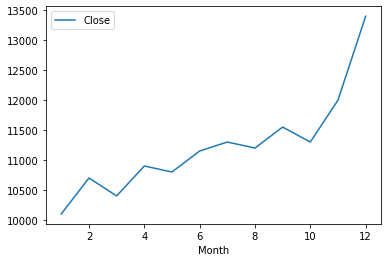

In [49]:
df_g = df_a[['Close']]
df_g.plot()

In [50]:
# df_r = df_a.reset_index()
# df_r
df_a = df_a.set_index('index')
df_a

,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,
2019-01-01 00:00:00+09:00,10100,10850,10900,10000,137977,2018,2018-07
2019-02-01 00:00:00+09:00,10700,10550,10900,9990,170253,2018,2018-06
2019-03-01 00:00:00+09:00,10400,10900,10950,10150,155769,2018,2018-06
2019-04-01 00:00:00+09:00,10900,10800,11050,10500,133548,2018,2018-06
2019-05-01 00:00:00+09:00,10800,10900,11000,10700,63039,2018,2018-06
2019-06-01 00:00:00+09:00,11150,11400,11450,11000,55519,2018,2018-06
2019-07-01 00:00:00+09:00,11300,11250,11450,10750,134805,2018,2018-06
2019-08-01 00:00:00+09:00,11200,11350,11750,11200,133002,2018,2018-06
2019-09-01 00:00:00+09:00,11550,11200,11600,10900,308596,2018,2018-06


In [51]:
df_sorted = df_a.sort_index(ascending=False)
df_sorted

,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,
2019-12-01 00:00:00+09:00,13400,13600,13600,12900,201376,2018,2018-06
2019-11-01 00:00:00+09:00,12000,13400,13400,12000,309787,2018,2018-06
2019-10-01 00:00:00+09:00,11300,11850,11950,11300,180656,2018,2018-06
2019-09-01 00:00:00+09:00,11550,11200,11600,10900,308596,2018,2018-06
2019-08-01 00:00:00+09:00,11200,11350,11750,11200,133002,2018,2018-06
2019-07-01 00:00:00+09:00,11300,11250,11450,10750,134805,2018,2018-06
2019-06-01 00:00:00+09:00,11150,11400,11450,11000,55519,2018,2018-06
2019-05-01 00:00:00+09:00,10800,10900,11000,10700,63039,2018,2018-06
2019-04-01 00:00:00+09:00,10900,10800,11050,10500,133548,2018,2018-06


In [52]:
df_value = df_a.sort_values(by='Volume', ascending=False)
df_value

,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,
2019-11-01 00:00:00+09:00,12000,13400,13400,12000,309787,2018,2018-06
2019-09-01 00:00:00+09:00,11550,11200,11600,10900,308596,2018,2018-06
2019-12-01 00:00:00+09:00,13400,13600,13600,12900,201376,2018,2018-06
2019-10-01 00:00:00+09:00,11300,11850,11950,11300,180656,2018,2018-06
2019-02-01 00:00:00+09:00,10700,10550,10900,9990,170253,2018,2018-06
2019-03-01 00:00:00+09:00,10400,10900,10950,10150,155769,2018,2018-06
2019-01-01 00:00:00+09:00,10100,10850,10900,10000,137977,2018,2018-07
2019-07-01 00:00:00+09:00,11300,11250,11450,10750,134805,2018,2018-06
2019-04-01 00:00:00+09:00,10900,10800,11050,10500,133548,2018,2018-06


In [53]:
# Period 배열

pr_m = pd.period_range(start='2019-01-01',
                       end=None,
                       periods=3,
                       freq='M') # 월(Month)
print(pr_m, '\n')

pr_h = pd.period_range(start='2019-01-01',
                       end=None,
                       periods=3,
                       freq='H') # 시간(Hours)
print(pr_h)

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]') 

PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]')


python, numpy, pandas 날짜 타입 비교 및 정리
https://ellun.tistory.com/320

In [54]:
# timestamp -> str 변환

import time

today = time.time()
print(today, type(today), '\n')
s = str(today)
print(s, type(s))

1642584574.1362169 <class 'float'> 

1642584574.1362169 <class 'str'>


In [55]:
# datetime -> str

from datetime import datetime
# string for time
s = datetime.now().strftime('%Y-%m-%d %H:%M:%S') # Y년(y년도) m월 d날 H시 M분 S초
print(s, type(s))

2022-01-19 18:29:34 <class 'str'>


In [56]:
# str -> datetime

s = '2022-01-17 14:14:24'
dt = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
print(dt, type(dt))

2022-01-17 14:14:24 <class 'datetime.datetime'>


In [57]:
# str -> timestamp

from datetime import datetime
import time

s = '2022-01-17 14:14:24'
# string passing time
ts = time.mktime(datetime.strptime(s, '%Y-%m-%d %H:%M:%S').timetuple())
print(ts)

1642396464.0


In [58]:
# datetime -> timestamp

print(datetime.now(), type(datetime.now()), '\n')
ts = time.mktime(datetime.now().timetuple())
print(ts, type(ts))

2022-01-19 18:29:34.460148 <class 'datetime.datetime'> 

1642584574.0 <class 'float'>


In [59]:
# [과제] 1) str -> datetime, 2) timestamp -> str -> datetime, 3) datetime -> str -> timestamp

from datetime import datetime
import time

# str -> datetime
s = '2022-02-22 22:22:22'
print(s, type(s))
dt = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
print(dt, type(dt), '\n')

# timestamp -> str -> datetime
ts = time.time()
print(ts, type(ts))
s = str(ts)
print(s, type(s))
dt = datetime.fromtimestamp(float(s))
# dt = time.mktime(datetime.strptime(s, '%Y-%m-%d %H:%M:%S.%f').timetuple())
print(dt, type(dt), '\n')

# datetime -> str -> timestamp
dt = datetime.now()
print(dt, type(dt))
s = datetime.strftime(dt, '%Y-%m-%d %H:%M:%S')
print(s, type(s))
ts = time.mktime(datetime.strptime(s, '%Y-%m-%d %H:%M:%S').timetuple())
print(ts, type(ts))

2022-02-22 22:22:22 <class 'str'>
2022-02-22 22:22:22 <class 'datetime.datetime'> 

1642584574.5367515 <class 'float'>
1642584574.5367515 <class 'str'>
2022-01-19 18:29:34.536752 <class 'datetime.datetime'> 

2022-01-19 18:29:34.537709 <class 'datetime.datetime'>
2022-01-19 18:29:34 <class 'str'>
1642584574.0 <class 'float'>


In [60]:
# 1년 전 datetime 값

from datetime import timedelta
import time

datetime_now = datetime.now()
delta_datetime = timedelta(days=-365)
print(delta_datetime)
datetime_now + delta_datetime

-365 days, 0:00:00


datetime.datetime(2021, 1, 19, 18, 29, 34, 621368)

In [61]:
# 두 날자간의 일수 구하기

from datetime import datetime

since_timestamp = datetime.strptime('20180301', '%Y%m%d')
until_timestamp = datetime.strptime('20180331', '%Y%m%d')
result = until_timestamp - since_timestamp
result

datetime.timedelta(days=30)

In [62]:
# 특정 요일 구하기

import datetime

def get_yoil(y, m, d):
    days = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
    return days[datetime.date(y, m, d).weekday()] # 월요일부터 인덱스 0
get_yoil(2022, 1, 17)

'MON'

In [63]:
# 판다스 이용

t = pd.Timestamp(1513393335, unit='s', tz='US/Pacific')
print(t, type(t))

2017-12-15 19:02:15-08:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [64]:
today = time.time()
today

1642584574.952246

In [65]:
date = pd.Timestamp(1642399746.87591, unit='s', tz='Asia/Seoul')
print(date, type(date))

2022-01-17 15:09:06.875910044+09:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [66]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1960-01-10'))

DatetimeIndex(['1960-01-11', '1960-01-12', '1960-01-13'], dtype='datetime64[ns]', freq=None)

In [67]:
pr_m = pd.period_range(start='2019-01-01', end=None, periods=3, freq='M')
pr_m

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')

In [68]:
import numpy as np

sr0 = pd.Series(pd.date_range('2021-01-01', periods=10, freq='D'), name='date')
sr1 = pd.Series(np.random.randint(1000, 2000, 10), name='price')
sr2 = pd.Series((np.random.rand(10)*100).round(2), name='profit')
df = pd.concat([sr0, sr1, sr2], axis=1)
df

,date,price,profit
0,2021-01-01,1744,14.18
1,2021-01-02,1102,49.57
2,2021-01-03,1239,69.13
3,2021-01-04,1556,55.08
4,2021-01-05,1963,64.44
5,2021-01-06,1804,18.42
6,2021-01-07,1330,73.65
7,2021-01-08,1969,93.04
8,2021-01-09,1634,50.75
9,2021-01-10,1571,16.11


In [69]:
import pandas as pd

df = pd.read_csv('./dataset/stock-data.csv')
df

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


In [70]:
# 연습문제 - stock-data.csv를 데이터프레임으로 불러와서 datetime64 자료형으로 변환한 후 년, 월, 일로 분리하고 year를 인덱스로 세팅하여 출력

df1 = df.copy()
df1['Date'] = pd.to_datetime(df1.Date)
print(df1.info())
df1['Year'] = df1.Date.dt.year
display(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     datetime64[ns]
 1   Close   20 non-null     int64         
 2   Start   20 non-null     int64         
 3   High    20 non-null     int64         
 4   Low     20 non-null     int64         
 5   Volume  20 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.1 KB
None


,Date,Close,Start,High,Low,Volume,Year
0,2018-07-02,10100,10850,10900,10000,137977,2018
1,2018-06-29,10700,10550,10900,9990,170253,2018
2,2018-06-28,10400,10900,10950,10150,155769,2018
3,2018-06-27,10900,10800,11050,10500,133548,2018
4,2018-06-26,10800,10900,11000,10700,63039,2018
5,2018-06-25,11150,11400,11450,11000,55519,2018
6,2018-06-22,11300,11250,11450,10750,134805,2018
7,2018-06-21,11200,11350,11750,11200,133002,2018
8,2018-06-20,11550,11200,11600,10900,308596,2018
9,2018-06-19,11300,11850,11950,11300,180656,2018


In [71]:
# 연습문제 - stock-data.csv를 데이터프레임으로 불러와서 datatime64 자료형으로 변환한 후에 period로 변환하고
# 년월일 표기 변경하여 년월을 인덱스로 셋팅하여 출력

df2 = df.copy()
df2['Date'] = pd.to_datetime(df2.Date)
print(df2.info())

df2['YM'] = df2.Date.dt.to_period(freq='M')
display(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     datetime64[ns]
 1   Close   20 non-null     int64         
 2   Start   20 non-null     int64         
 3   High    20 non-null     int64         
 4   Low     20 non-null     int64         
 5   Volume  20 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.1 KB
None


,Date,Close,Start,High,Low,Volume,YM
0,2018-07-02,10100,10850,10900,10000,137977,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06
5,2018-06-25,11150,11400,11450,11000,55519,2018-06
6,2018-06-22,11300,11250,11450,10750,134805,2018-06
7,2018-06-21,11200,11350,11750,11200,133002,2018-06
8,2018-06-20,11550,11200,11600,10900,308596,2018-06
9,2018-06-19,11300,11850,11950,11300,180656,2018-06


In [113]:
auto_df = pd.read_csv('./dataset/auto-mpg.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [114]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [117]:
# [과제] 'mpg'를 'kpl'로 환산하여 새로운 열을 생성하고 처음 3개 행을 소수점 아래 둘째 자리에서 반올림하여 출력

new_df = auto_df.copy()
new_df['kpl'] = (new_df.mpg/2.352)
new_df[['mpg','kpl']].head(3).round(2)

,mpg,kpl
0,18.0,7.65
1,15.0,6.38
2,18.0,7.65


In [126]:
import numpy as np

df1 = auto_df.copy()
df1.horsepower.unique() # 현재 값 리스트(중복 제거) 확인

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [127]:
# [과제] horsepower 열을 체크해서 전처리가 필요한 사항을 기술(자료형 타입이 문자로 되어있는 이유 및 float 처리)
# hint - np.nan으로 대체 

df1.horsepower = df1.horsepower.replace('?', np.nan)
# 데이터 중 '?'가 포함되어 있었기 때문에 float가 아닌 obj로 저장됨, 결측값 처리
df1.info() # 변환이 안 되어서 여전히 object임을 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [128]:
df1.horsepower.unique() # '?' -> nan 변경된 것 확인

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [129]:
# [과제] horsepower 열의 자료형 타입 문제를 해결하고 NAN 값 처리 전 후로 비교

df1.horsepower = df1.horsepower.astype(float)
# object 값이 없기 때문에 오류 없이 float 형변환 가능
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [130]:
print(df1.horsepower.isnull().sum())
df1.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락(nan)된 데이터 행 삭제
df1.horsepower.isnull().sum()

6


0

In [132]:
# [과제] auto_df를 바이너리 파일로 auto_df.pkl로 저장 후 다시 불러오기 

import pickle

# with open('./dataset/auto_df.pkl', 'wb') as f:
#     pickle.dump(df, f)
    
# with open('./dataset/auto_df.pkl', 'rb') as f:
#     data = pickle.load(f)
# data

df1.to_pickle('./dataset/auto_df.pkl') # 저장
df1 = pd.read_pickle('./dataset/auto_df.pkl') # 불러오기
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [133]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [136]:
# [과제] horsepower 열의 최대값의 절대값으로 horsepower 열의 모든 데이터를 나눠서 저장

df_max = df1.horsepower.max()
df_max
df_div = df1.horsepower/abs(df_max)
df_div

0      0.565217
1      0.717391
2      0.652174
3      0.652174
4      0.608696
         ...   
393    0.373913
394    0.226087
395    0.365217
396    0.343478
397    0.356522
Name: horsepower, Length: 392, dtype: float64

<AxesSubplot:>

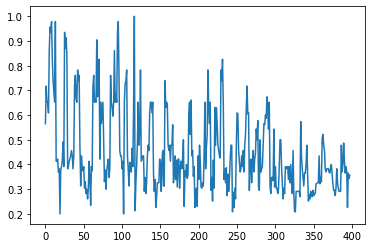

In [138]:
df_div.plot()

In [139]:
# [과제] horsepower 각 열 데이터에서 해당 열의 최소값을 뺀 값을 분자, 해당 열의 최대값 - 최소값을 분모로 계산하여 저장

a = min(df1.horsepower)
b = max(df1.horsepower)
df1.horsepower=df1.horsepower.apply(lambda x: (x-a)/(b-a))
df1.horsepower

0      0.456522
1      0.646739
2      0.565217
3      0.565217
4      0.510870
         ...   
393    0.217391
394    0.032609
395    0.206522
396    0.179348
397    0.195652
Name: horsepower, Length: 392, dtype: float64

In [142]:
# [과제] origin 열의 고유값 출력

df1['origin'].value_counts()
df1.origin.unique()

array([1, 3, 2], dtype=int64)

In [85]:
# [과제] 정수형 데이터를 문자형 데이터로 변환한 후 고유값 출력(1:'USA', 2:'EU', 3:'JAPAN')

def toStr(a):
    Contry = ['USA', 'EU', 'JAPAN']
    return Contry[a-1]

df1['origin'] = df1.origin.apply(lambda x:toStr(x))
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,EU,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,USA,ford ranger


In [86]:
df1['origin'].replace({1:'USA', 2:'EU', 3:'JAPAN'}, inplace=True)
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,EU,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,USA,ford ranger


In [143]:
# [과제] origin 열의 자료형을 확인하고 범주형(category)으로 변환하여 출력

df1 = pd.read_pickle('./dataset/auto_df.pkl') # 불러오기

print(df1.info())

df1['origin']=df1.origin.astype('category')
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null

In [144]:
# [과제] origin 열을 범주형에서 문자열로 변환한 후 자료형 출력

df1['origin']=df1.origin.astype('str')
print(df1.origin.head(), df1.origin.dtype)

0    1
1    1
2    1
3    1
4    1
Name: origin, dtype: object object


In [145]:
# [과제] horsepower를 3개의 bin으로 나누고 bin_names = ['저출력', '보통출력', '고출력']으로 출력
# np.histogram() 함수로 3개의 bin으로 나눈다

import numpy as np

count, bin_dividers = np.histogram(df1.horsepower, bins=3)                
print(bin_dividers)

bin_names = ['저출력','보통출력','고출력']
df1['hp_bin'] = pd.cut(x=df1.horsepower, # 데이터 배열
                   bins=bin_dividers, # 경계 값 리스트
                   labels=bin_names, # bin 이름
                   include_lowest=True) # 첫 경계값 포함
df1[['horsepower','hp_bin']].head(10)

[ 46.         107.33333333 168.66666667 230.        ]


,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력


In [146]:
# [과제] horsepower 열의 최대값의 절대값으로 모든 데이터를 나누는 정규화를 수행한 후 통계요약표 출력

df1['horsepower'] = df1['horsepower']/abs(df1['horsepower'].max())
df1[['horsepower']].describe()

,horsepower
count,392.000000
mean,0.454215
std,0.167353
min,0.200000
25%,0.326087
50%,0.406522
75%,0.547826
max,1.000000
